<h1> Data Preprocessing </h1>

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append("..")

<h3> Data Cleaning </h3>

In [3]:
from src.data.load_data import load_data
from src.data.describe_data import describe_data
from src.data.cleaning_data import clean_data

from src.visualization.correlation_plot import correlation_plot
from src.visualization.distribution_plot import distribution_plot

In [4]:
df = load_data("../data/raw/water_potability.csv")

Successfully loaded data from ../data/raw/water_potability.csv


In [5]:
describe_data(df)

Data Preview: 
         pH          Iron    Nitrate    Chloride           Lead      Zinc  \
0  7.768339  5.136889e-01  21.500638  140.117085   2.971819e-02  4.430943   
1  7.343559  1.720000e-09  16.816792  104.118625   1.060000e-31  1.487122   
2  8.241575  2.110270e-04   5.955717  130.675245  9.320000e-105  0.320413   
3  7.114168  1.544037e+00  11.784159  118.955666   1.307060e-04  0.305122   
4  8.319676  5.499565e-01   2.364470  115.193736   1.020000e-43  0.865224   

   Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  \
0   0.193567  0.063537       NaN  2.846212  269.516517    297.958269   
1   1.240624  0.620398  1.208432  3.006684  121.857013    323.018648   
2   0.160953  1.282215  1.098263  4.138922  155.180890    208.373398   
3   0.008345  0.216062  1.408409  2.383822  440.356623           NaN   
4   0.051299  1.698124  0.265379  3.227538  180.866615    885.746443   

   Chlorine     Manganese  Total Dissolved Solids  Potability  
0  3.119899  3.600000e-05

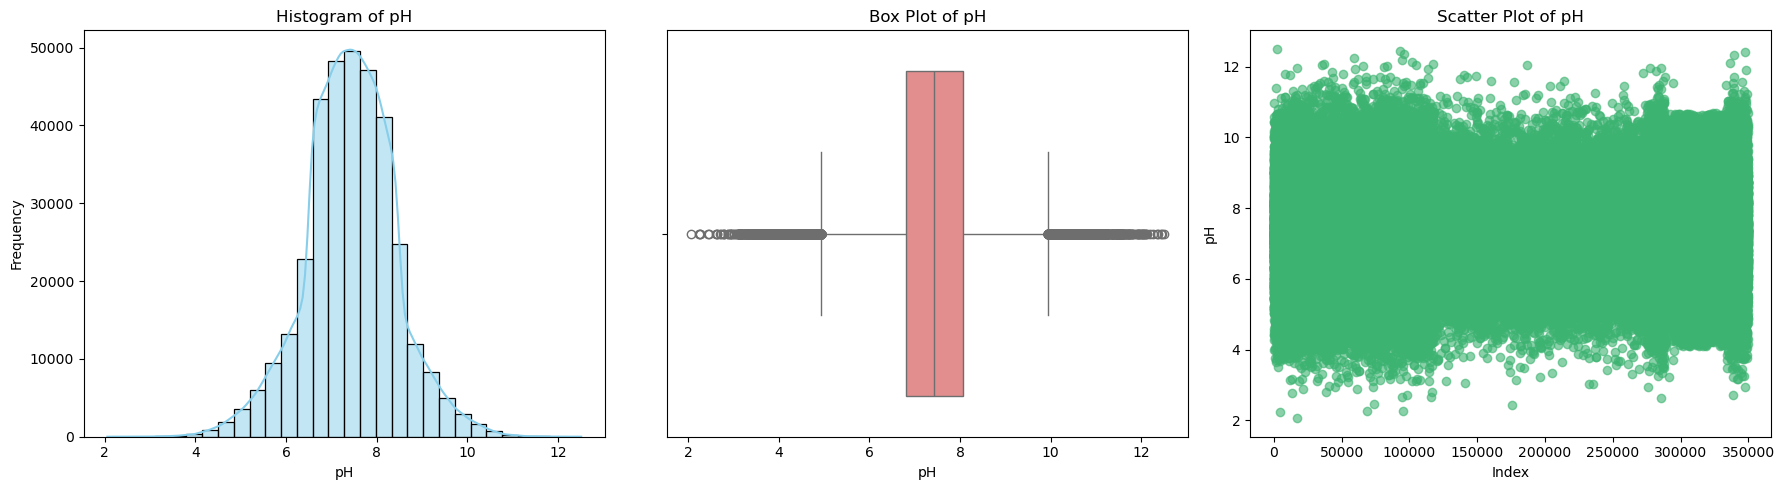

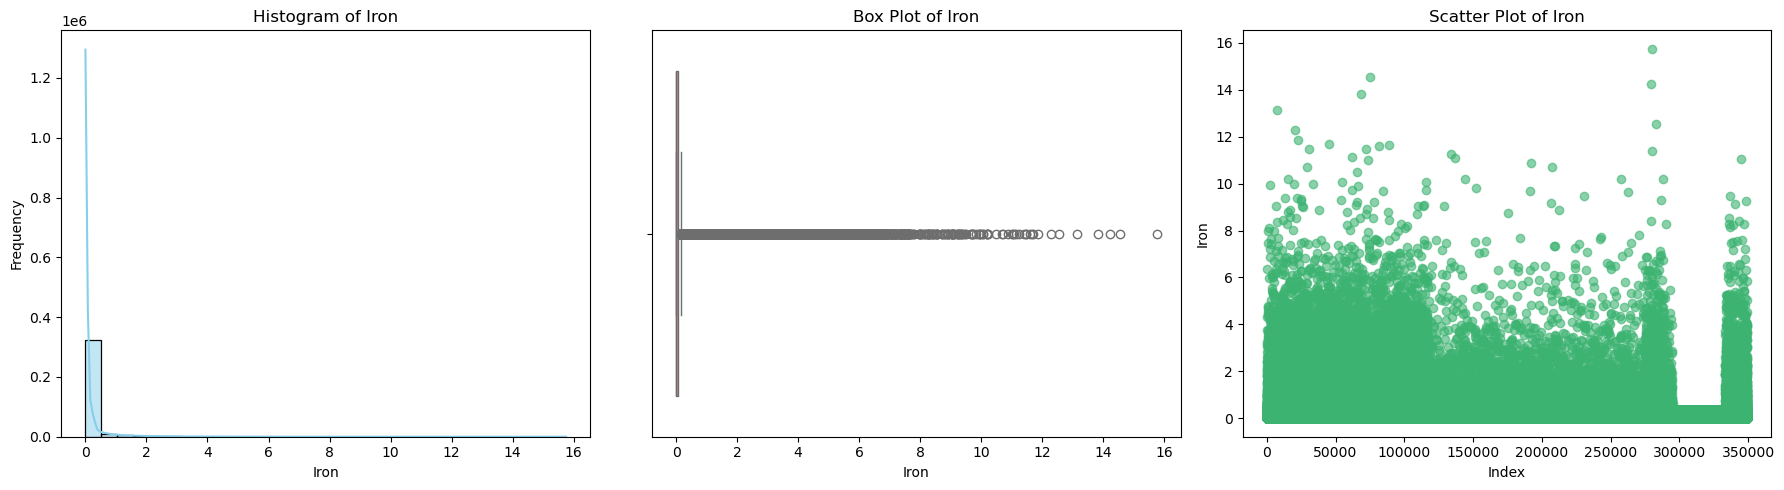

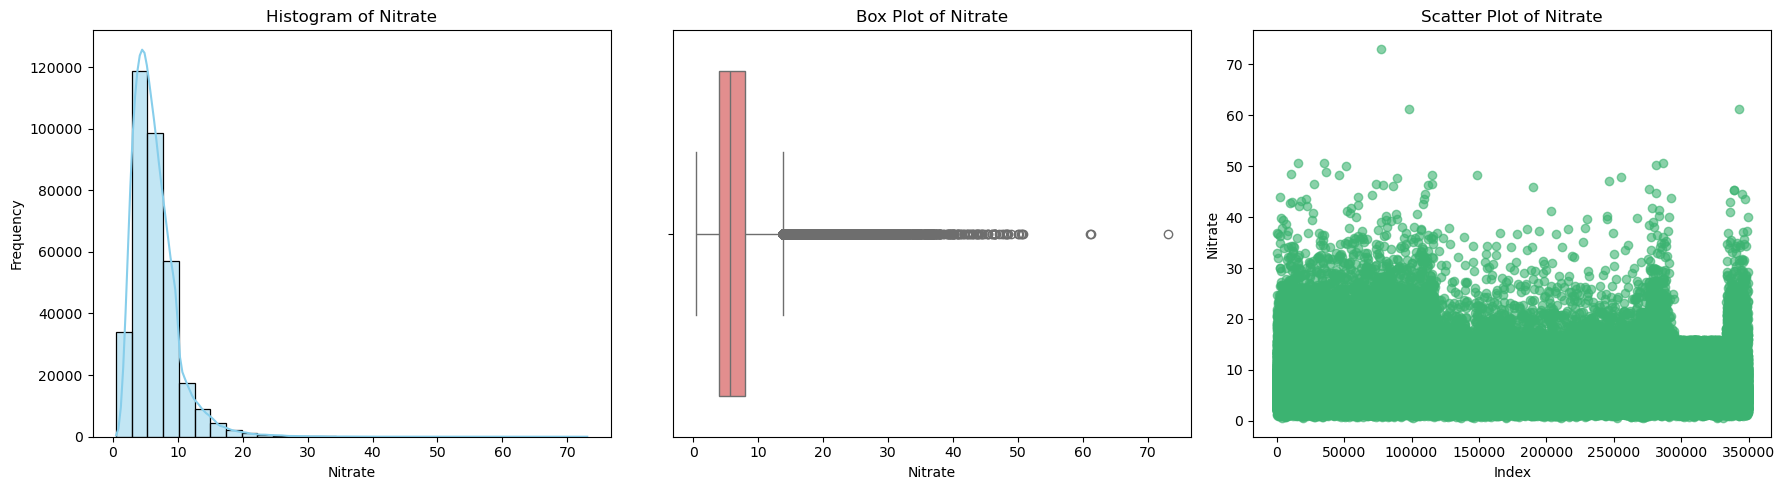

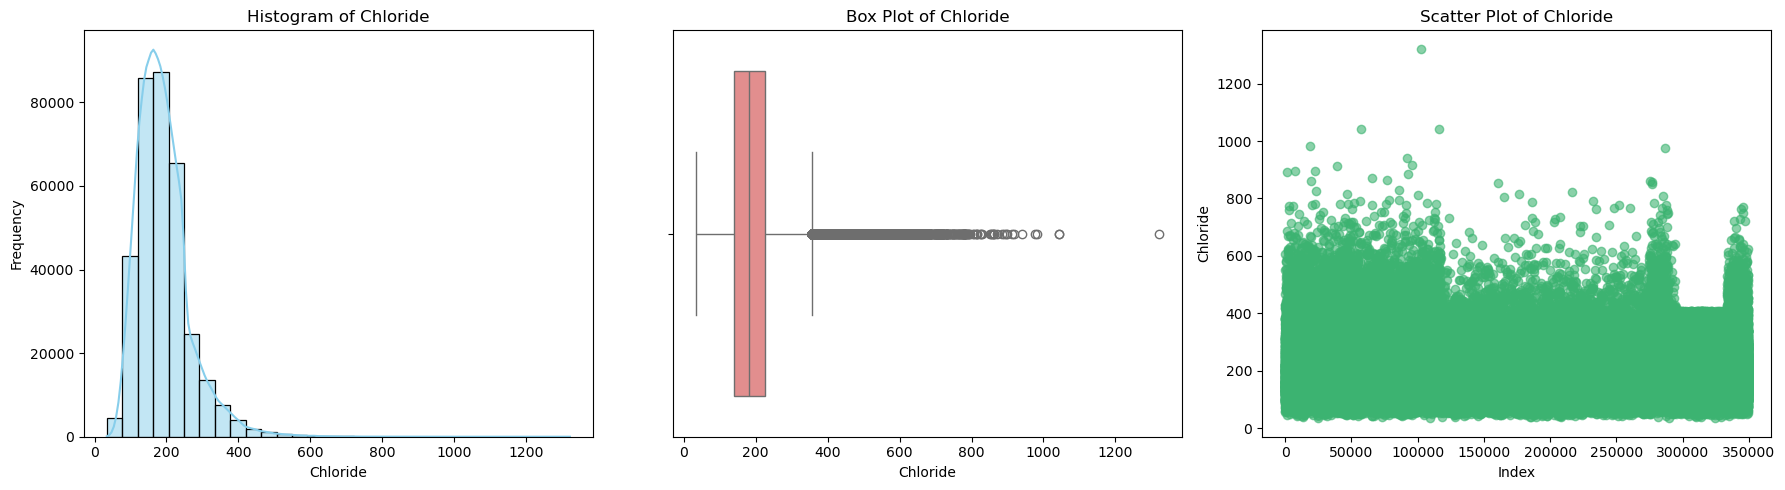

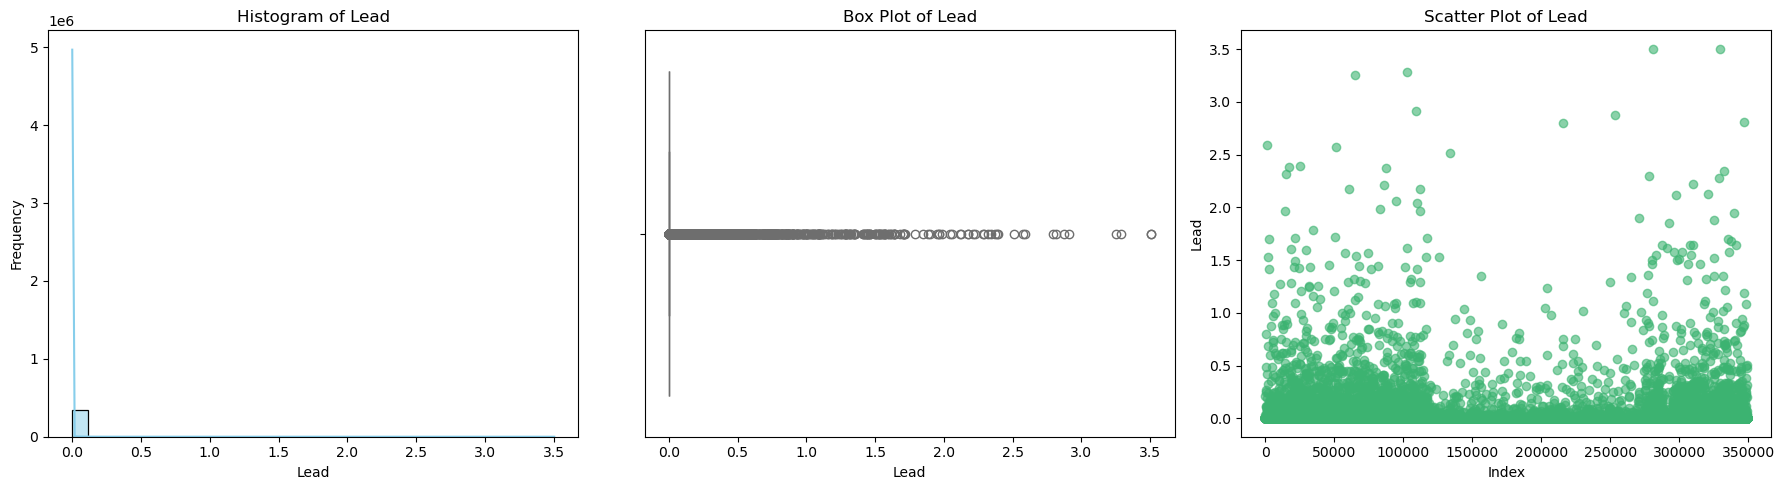

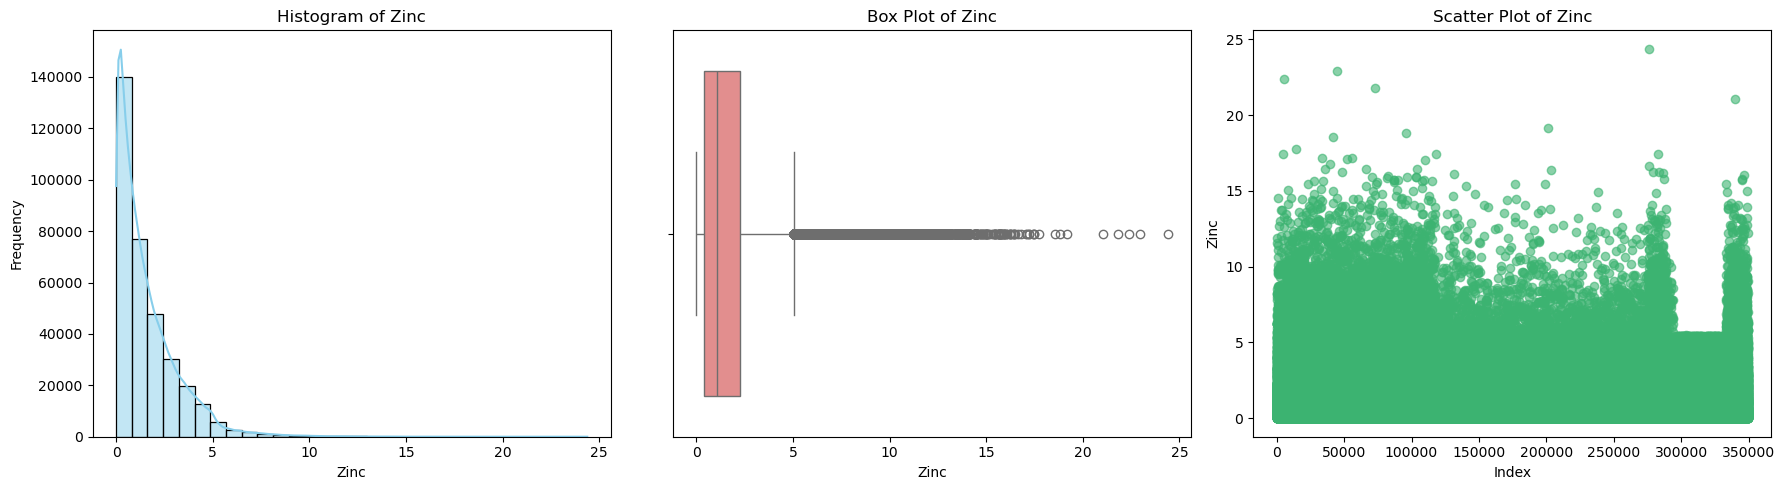

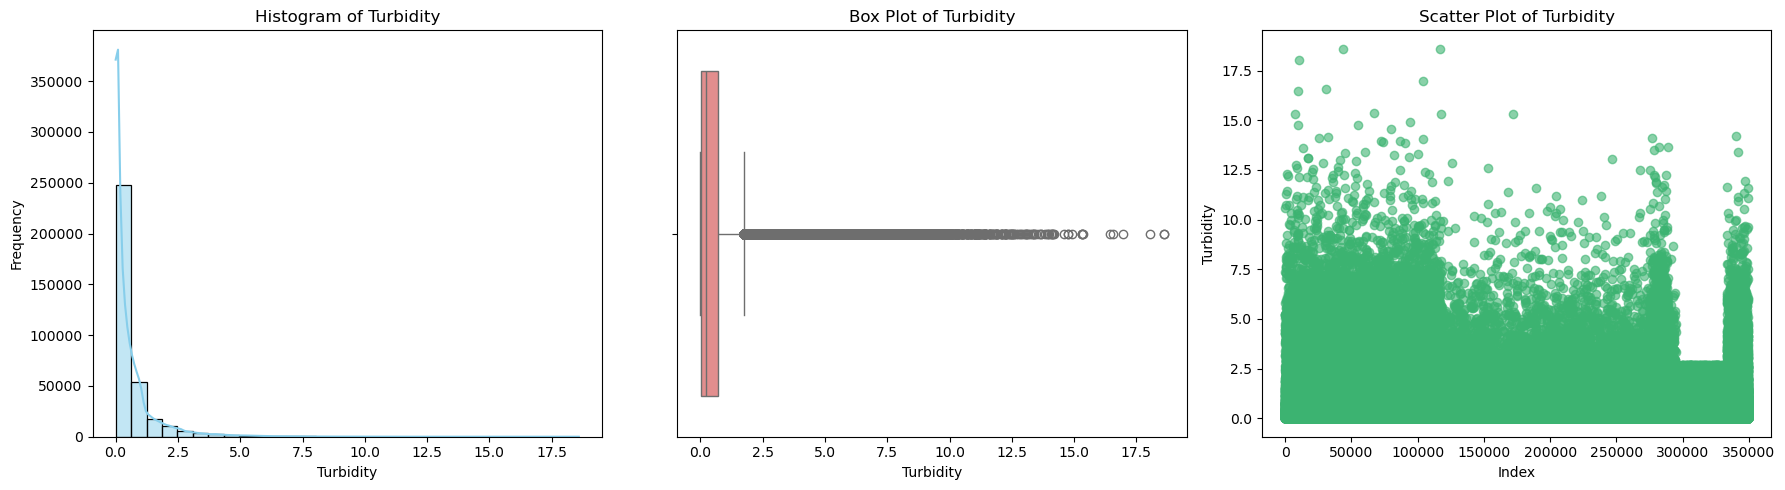

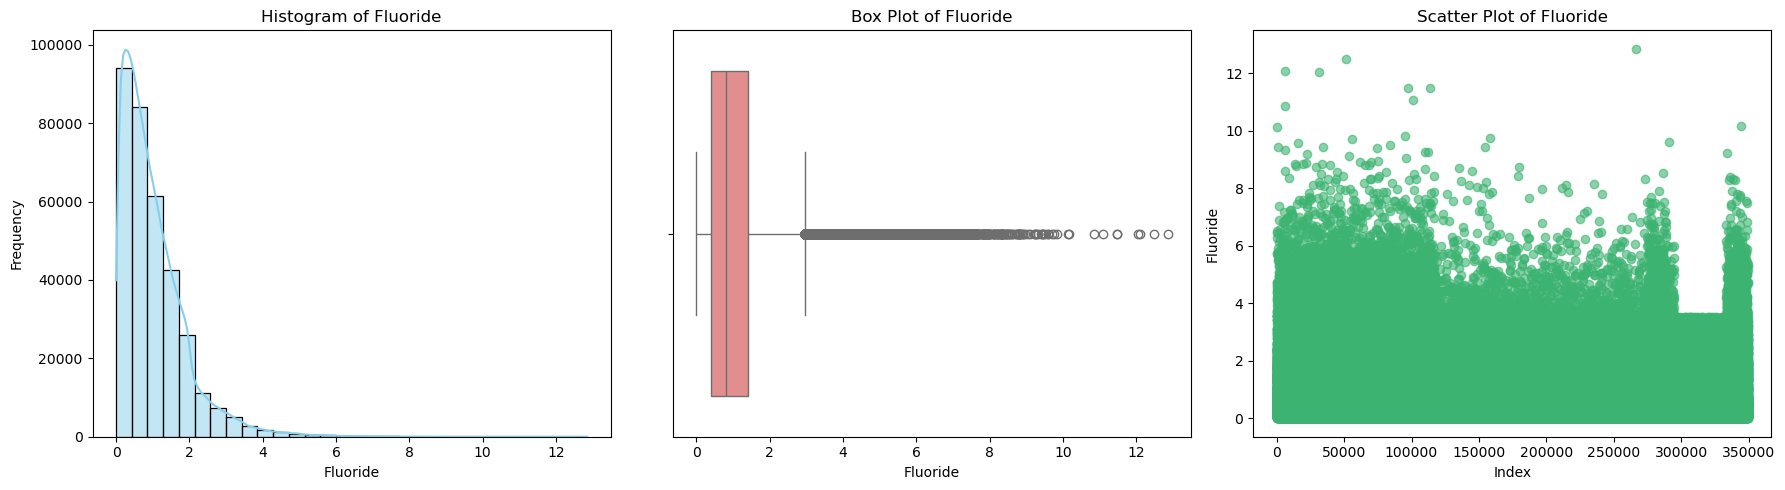

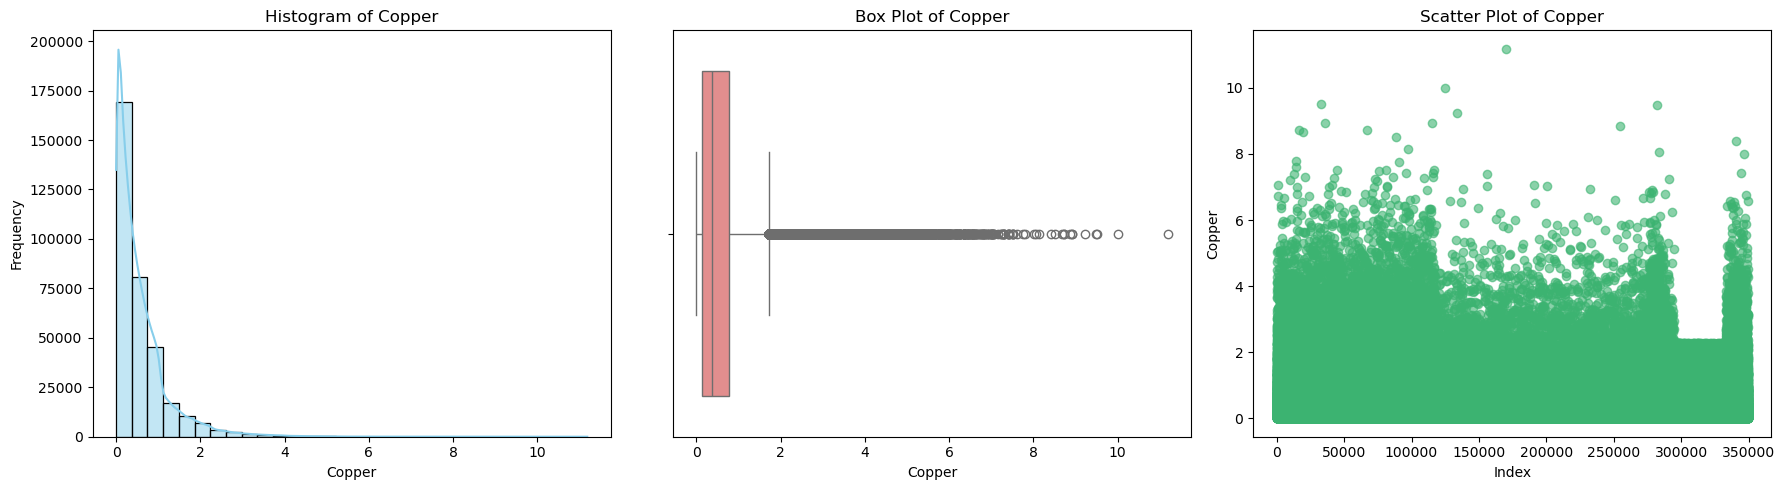

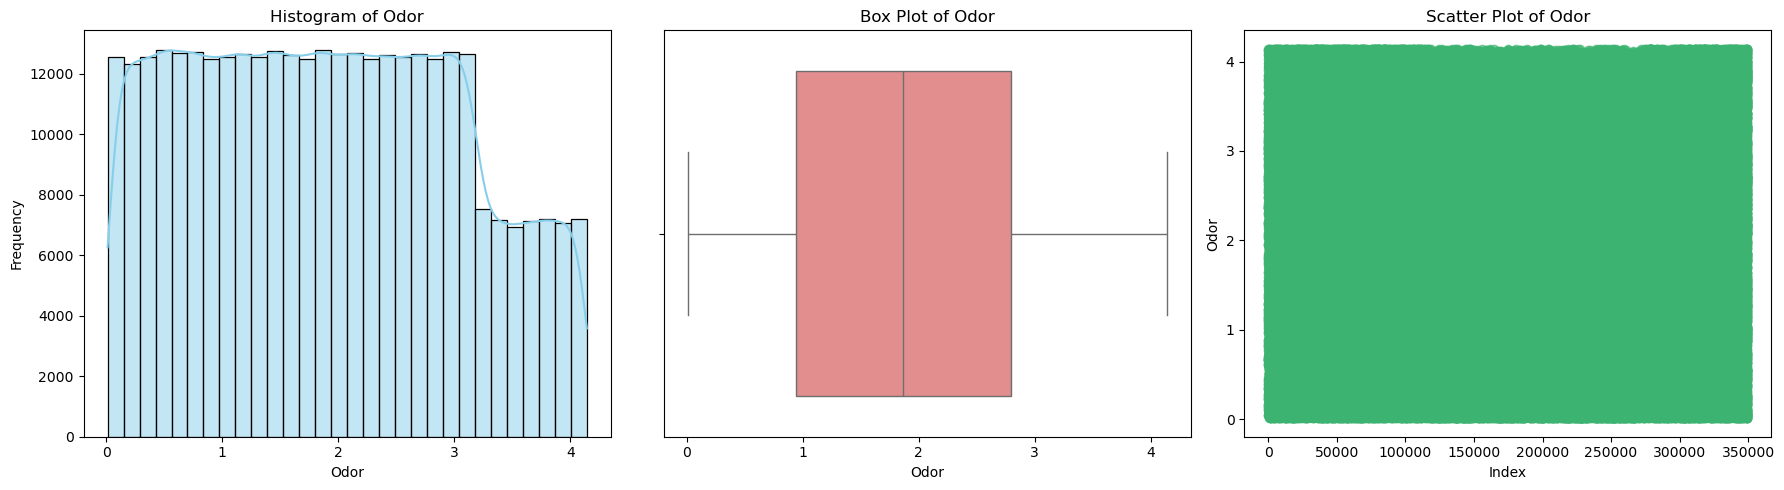

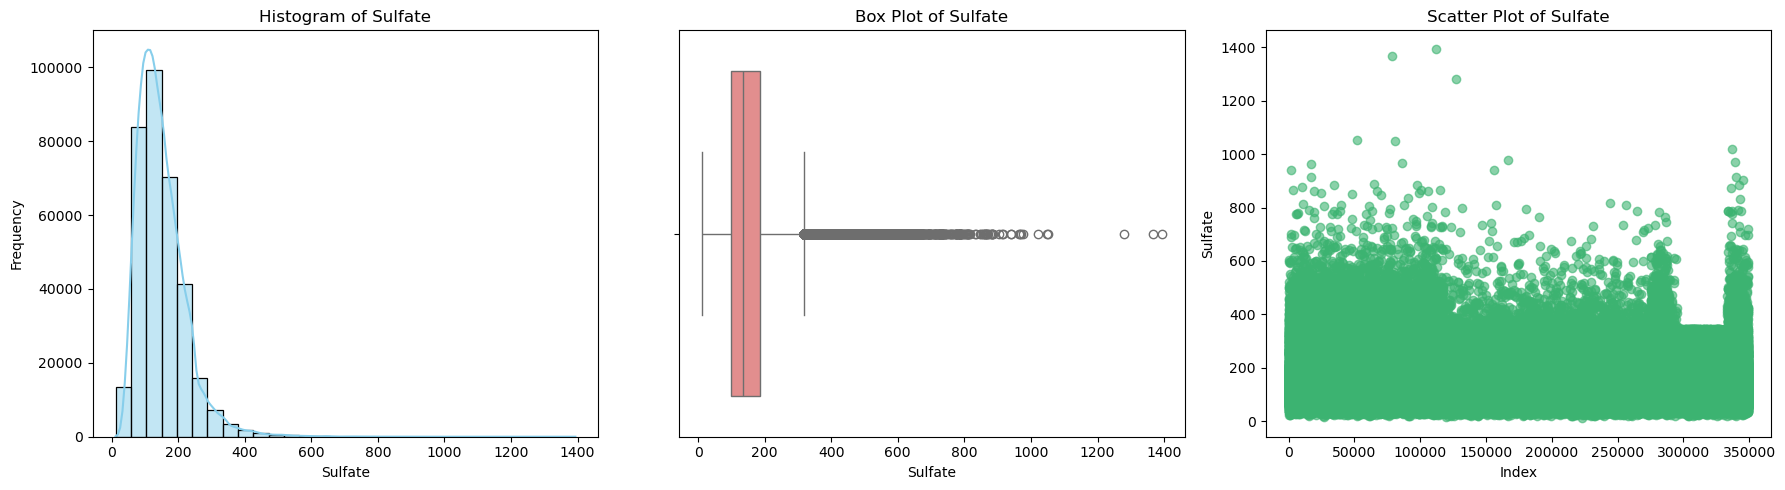

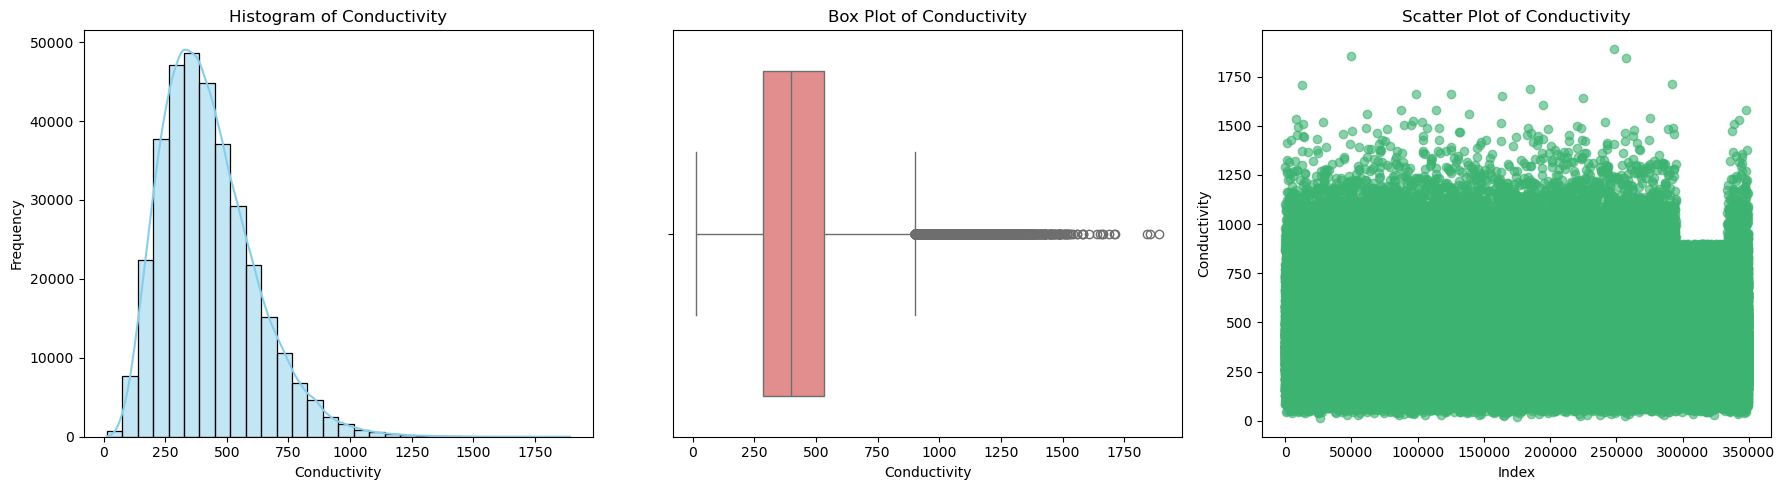

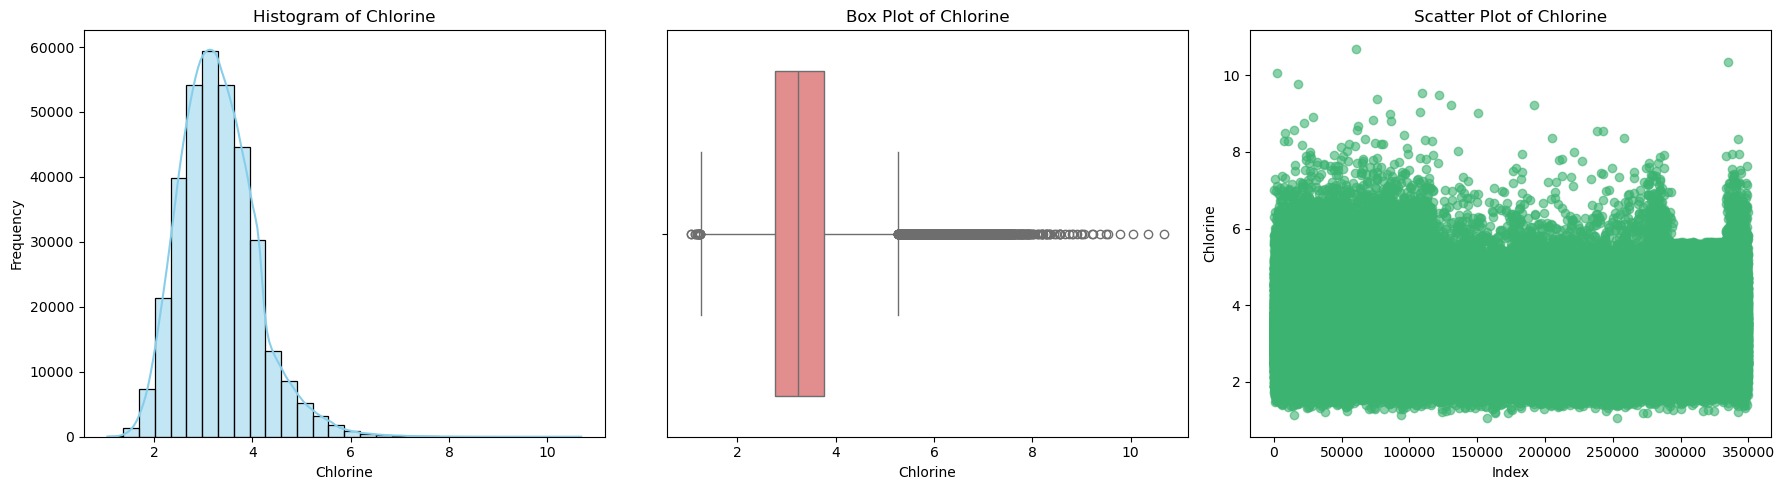

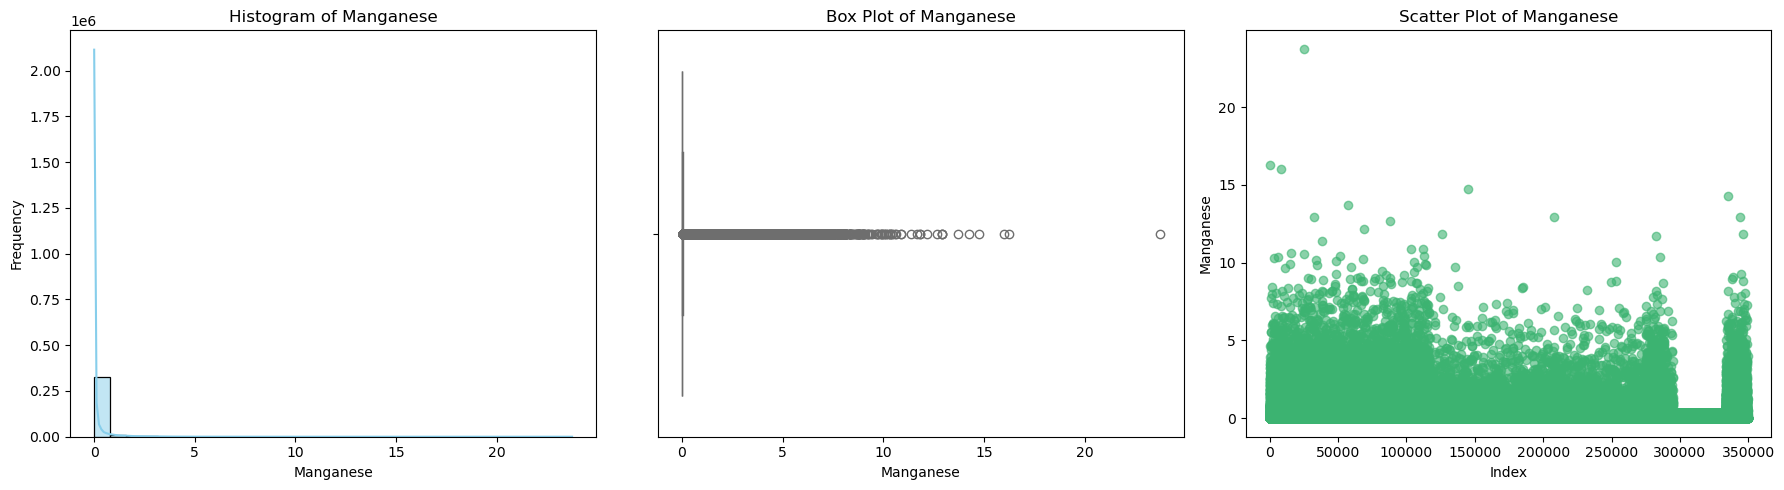

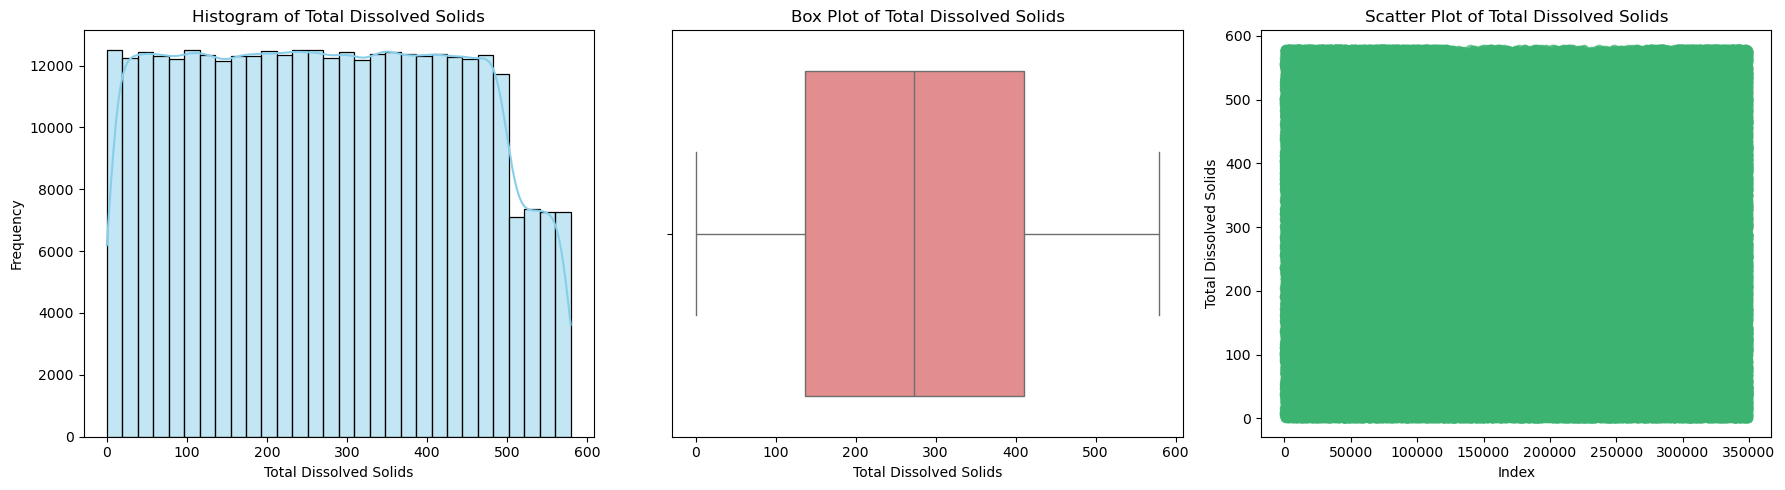

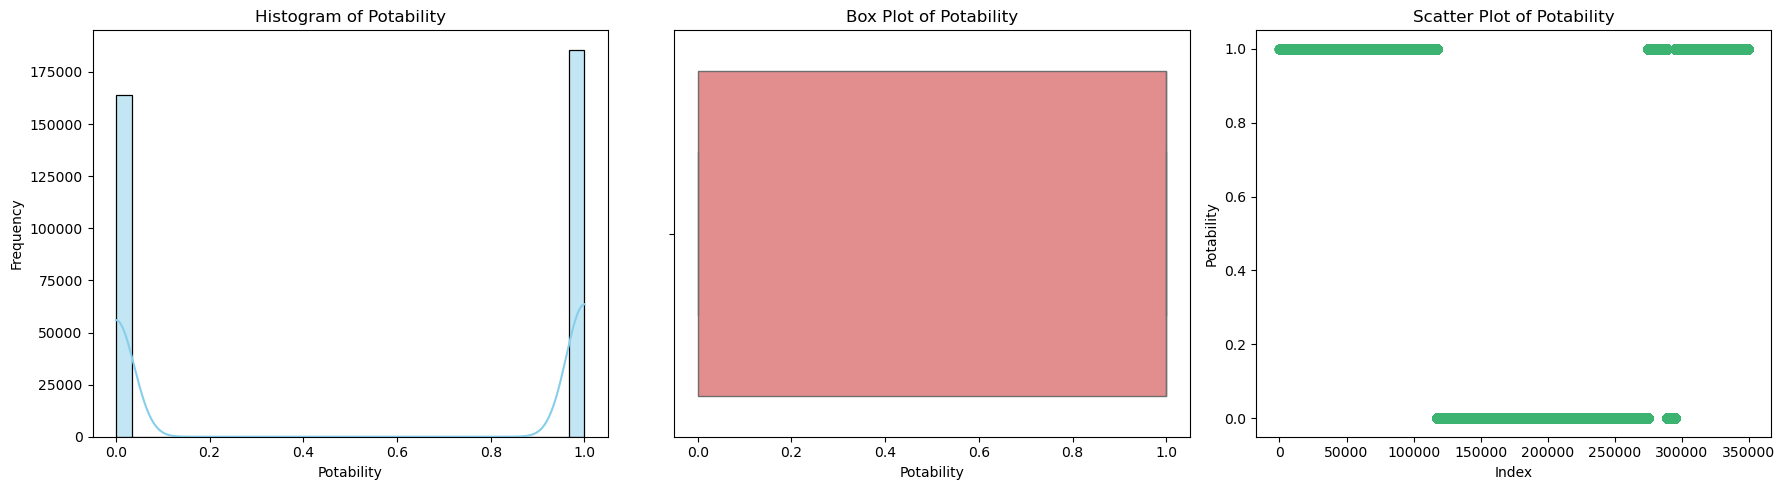

In [6]:
for column in df.columns:
    distribution_plot(df, column, f"../src/visualization/plot/distribution_{column}_plot.png")

In [7]:
distribution_dict = {
    "pH": "normal",
    "Iron": "polynomial",
    "Nitrate": "skewed",
    "Chloride": "skewed",
    "Lead": "polynomial",
    "Zinc": "skewed",
    "Turbidity": "skewed",
    "Fluoride": "skewed",
    "Copper": "skewed",
    "Odor": "uniform",
    "Sulfate": "skewed",
    "Conductivity": "skewed",
    "Chlorine": "skewed",
    "Manganese": "polynomial",
    "Total Dissolved Solids": "uniform"
}

In [8]:
df = clean_data(df, distribution_dict = distribution_dict)

Starting data cleaning process...
Removed 10617 duplicate rows.
Dropped 91980 missing values.


c:\Evan-Binus\Semester-3\COMP6065001 - Artificial Intelligence\Assignment\AoL\Repository\notebooks\..\src\data\cleaning_data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.log(df[column])


Removed 0 empty columns.
Data cleaning process completed.


In [9]:
describe_data(df)

Data Preview: 
          pH       Iron    Nitrate    Chloride        Lead      Zinc  \
2   8.241575  -8.463524   5.955717  130.675245 -239.539272  0.320413   
4   8.319676  -0.597916   2.364470  115.193736  -98.991356  0.865224   
8   8.092761  -1.872390   4.751958  270.421397  -17.185209  0.182337   
10  5.729022  -2.193132  10.905054  130.803824 -250.791155  0.168952   
12  6.258979 -13.649996   2.959478  184.664136 -157.212553  2.131631   

    Turbidity  Fluoride    Copper      Odor     Sulfate  Conductivity  \
2    0.160953  1.282215  1.098263  3.735049  155.180890    208.373398   
4    0.051299  1.698124  0.265379  3.227538  180.866615    885.746443   
8    0.176997  0.335344  0.317947  1.184333  129.871695    685.032028   
10   0.023360  1.554565  0.150207  1.288641   75.520182    665.890705   
12   0.302692  1.204277  1.572764  2.362357  103.922547     85.141093   

    Chlorine  Manganese  Total Dissolved Solids  Potability  
2   3.376656  -6.858027              112.208950    

Correlation Values:
                              pH      Iron   Nitrate  Chloride      Lead  \
pH                      1.000000 -0.001431 -0.003748 -0.011769 -0.001488   
Iron                   -0.001431  1.000000  0.011082  0.014449  0.001301   
Nitrate                -0.003748  0.011082  1.000000  0.030823  0.003091   
Chloride               -0.011769  0.014449  0.030823  1.000000  0.003099   
Lead                   -0.001488  0.001301  0.003091  0.003099  1.000000   
Zinc                    0.001678 -0.000235  0.001352  0.001098  0.002154   
Turbidity              -0.007369  0.017356  0.022971  0.031510  0.001325   
Fluoride               -0.008872  0.007550  0.022919  0.028455  0.003085   
Copper                 -0.009714  0.008241  0.030400  0.036585  0.001116   
Odor                   -0.006868  0.012885  0.026920  0.042621  0.002494   
Sulfate                -0.004539  0.004740  0.013126  0.020861  0.001286   
Conductivity           -0.001780 -0.001314 -0.003719 -0.002269 -0.00

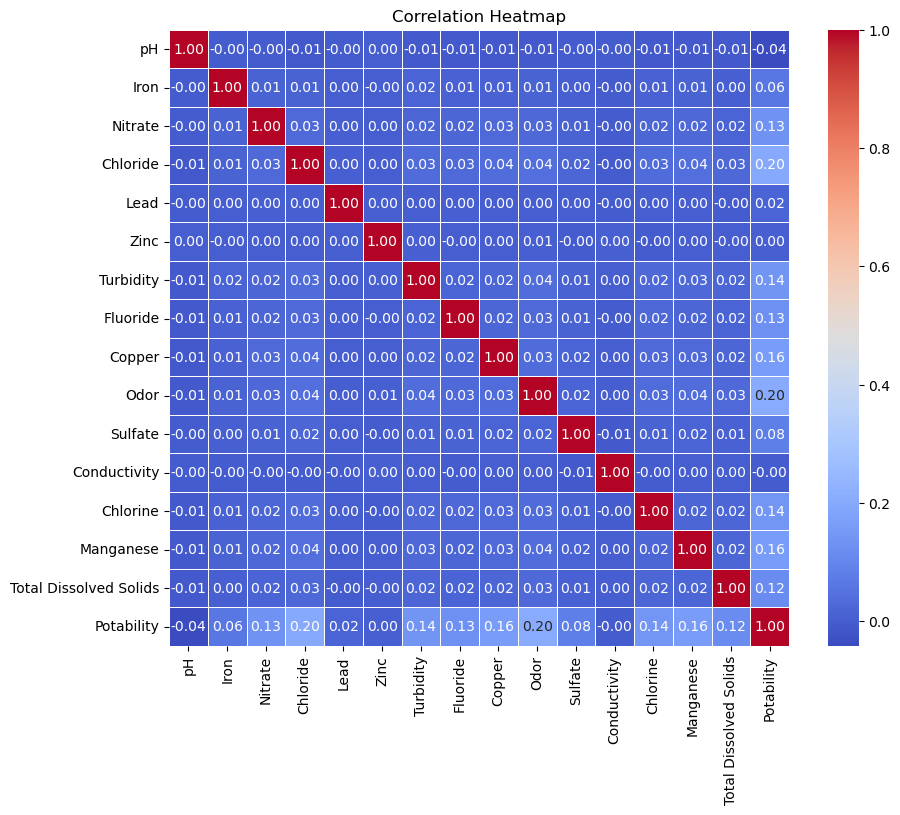

In [10]:
correlation_plot(df, "../src/visualization/plot/correlation_plot.png")

In [11]:
df = df[["pH", "Iron", "Nitrate", "Chloride", "Lead", "Turbidity", "Fluoride", "Copper", "Odor", "Sulfate", "Chlorine", "Manganese", "Total Dissolved Solids", "Potability"]]

In [13]:
df.to_csv("../data/processed/water_potability.csv", index = False)